In [16]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


In [4]:
(feature_train, label_train), (feature_test, label_test) = cifar10.load_data()

170498071/170498071 [==============================] - 342s 2us/step


In [11]:
#preprocessing
feature_train = feature_train/255
feature_test = feature_test/255

In [13]:
#dealing with numeric labels
cat_label_train = to_categorical(label_train, num_classes = 10)
cat_label_test = to_categorical(label_test, num_classes = 10)


In [31]:
image_learner = Sequential()
callback = EarlyStopping(patience = 2)
image_learner.add(Conv2D(filters = (32), kernel_size = (4, 4), strides = (1, 1), activation = "relu", input_shape = (32, 32, 3)))
image_learner.add(MaxPool2D(pool_size = (2, 2)))
# image_learner.add(Dropout(rate = np.random.rand()))
image_learner.add(Conv2D(filters = (64), kernel_size = (4, 4), strides = (1, 1), activation = "relu", input_shape = (32, 32, 3)))
image_learner.add(MaxPool2D(pool_size = (2, 2)))
# image_learner.add(Dropout(rate = np.random.rand()))
image_learner.add(Conv2D(filters = (128), kernel_size = (4, 4), strides = (1, 1), activation = "relu", input_shape = (32, 32, 3)))
image_learner.add(MaxPool2D(pool_size = (2, 2)))
# image_learner.add(Dropout(rate = np.random.rand()))
image_learner.add(Flatten())
image_learner.add(Dense(units = 128, activation = "relu"))
image_learner.add(Dense(units = 10, activation = "softmax"))
image_learner.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

In [32]:
image_learner.fit(x = feature_train, y = cat_label_train, validation_data = (feature_test, cat_label_test), epochs = 30, callbacks = [callback])

Epoch 1/30
1563/1563 [==============================] - 75s 45ms/step - loss: 1.5622 - accuracy: 0.4268 - val_loss: 1.3377 - val_accuracy: 0.5241
Epoch 2/30
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1732 - accuracy: 0.5858 - val_loss: 1.1212 - val_accuracy: 0.6016
Epoch 3/30
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0173 - accuracy: 0.6414 - val_loss: 1.0446 - val_accuracy: 0.6316
Epoch 4/30
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9108 - accuracy: 0.6818 - val_loss: 0.9635 - val_accuracy: 0.6713
Epoch 5/30
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8357 - accuracy: 0.7058 - val_loss: 0.9580 - val_accuracy: 0.6708
Epoch 6/30
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7741 - accuracy: 0.7294 - val_loss: 0.9324 - val_accuracy: 0.6785
Epoch 7/30
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7184 - accuracy: 0.7499 - val_loss: 0.9704 -

In [33]:
metrics = pan.DataFrame(image_learner.history.history)

<Axes: >

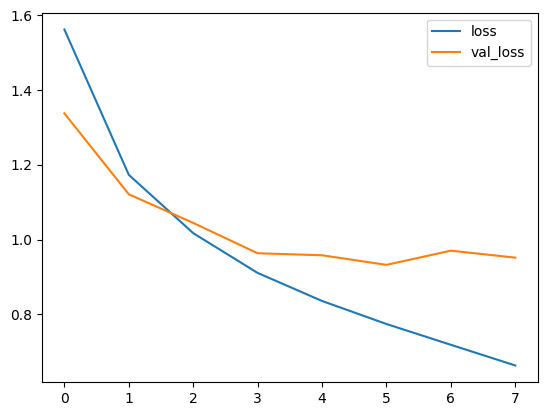

In [34]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

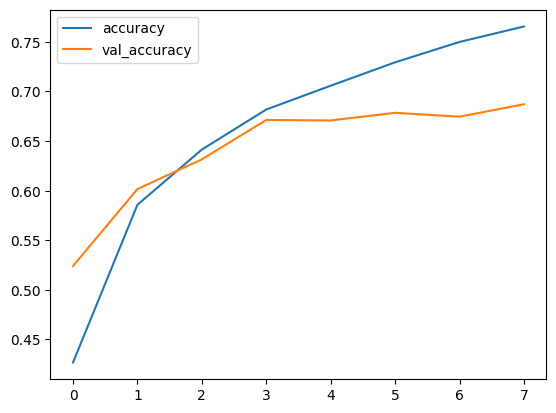

In [35]:
metrics[["accuracy", "val_accuracy"]].plot()

In [36]:
predictions = np.argmax(image_learner.predict(x = feature_test), axis = -1)

313/313 [==============================] - 2s 6ms/step


In [37]:
predictions

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [38]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.79      0.84      0.81      1000
           2       0.67      0.49      0.57      1000
           3       0.50      0.50      0.50      1000
           4       0.70      0.56      0.62      1000
           5       0.62      0.56      0.59      1000
           6       0.63      0.85      0.72      1000
           7       0.72      0.72      0.72      1000
           8       0.80      0.78      0.79      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



<Axes: >

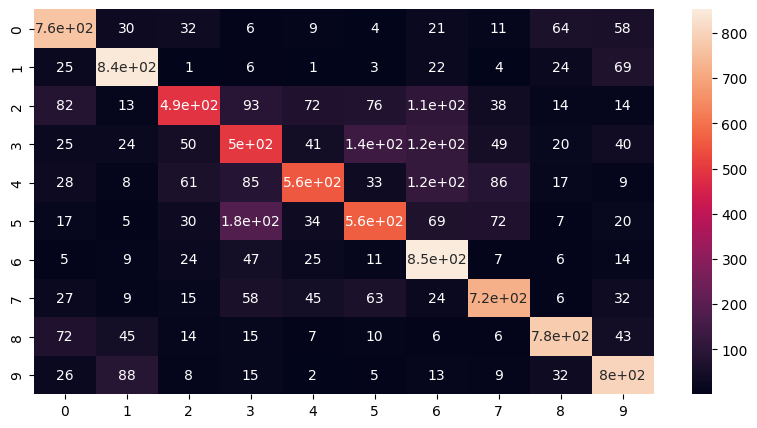

In [40]:
plotter.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(label_test, predictions) , annot = True)